In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [2]:
database_name = 'sociology-wos'
dtype = 'c'

In [3]:
# Parameters
database_name = "sociology-wos"
dtype = "fa"


In [4]:
cits = get_cnt("%s.doc" % database_name, [comb(dtype,'fy')])

cysum = load_variable("%s.%s.ysum" % (database_name,dtype))
cysum = list(cysum.values())

Loaded keys: dict_keys(['fa.fy'])
Available keys: ['a', 'c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']


In [5]:
if dtype == 'fa':
    CNT_LIM = 15
    CNT_STEP = 1
else:
    CNT_LIM = 100
    CNT_STEP = 5

In [6]:
def dead_now_cited_when(RANGE_START, RANGE_END, xmax=100):

    count_in_range = defaultdict(int)
    for cross,count in cits[comb(dtype,'fy')].items():
        if RANGE_END >= cross.fy >= RANGE_START:
            count_in_range[getattr(cross,dtype)] += count

    dying_count = defaultdict(lambda:defaultdict(int))
    
    YRLOOK = RANGE_END+20

    assert(xmax % CNT_STEP == 0)
    
    counts = np.array(range(0,xmax,CNT_STEP))
    linestyles = ['-','--','-.']

    for x in cysum:
        
        if count_in_range[x['name']] == 0: # omg can't believe I missed this...
            continue

        for dk in ['death_%s' % i for i in [0,1,2,3,5]]:
            dying_count[dk][(
                (count_in_range[x['name']]//CNT_STEP)*CNT_STEP,
                x[dk] is not None and x[dk] <= YRLOOK
            )] += 1
            dying_count[dk][(
                (count_in_range[x['name']]//CNT_STEP)*CNT_STEP,
                "total"
            )] += 1

    plt.subplots_adjust(top=1.5)

    shift = CNT_STEP*1.5

    plt.subplot(3,1,1)
    for i,dk in enumerate(['death_%s' % i for i in [3,5]]):
        probs = np.array([ 
            dying_count[dk][(c,True)]/dying_count[dk][(c,"total")] 
            if dying_count[dk][(c,"total")] else float("nan") 
            for c in counts 
        ])
        plt.plot(counts+(CNT_STEP-1)/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
        
    plt.legend();
    plt.xticks(counts)
    plt.xlim(min(counts)-shift,max(counts)+shift)
    plt.ylim(0,100)
    plt.ylabel("% dead")

    plt.subplot(3,1,2)
    for i,dk in enumerate(['death_%s' % i for i in [0,1,2]]):
        probs = np.array([ 
            dying_count[dk][(c,True)] / dying_count[dk][(c,"total")] 
            if dying_count[dk][(c,"total")] else float("nan") 
            for c in counts 
        ])
        plt.plot(counts+(CNT_STEP-1)/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
        
    plt.legend();
    plt.xticks(counts)
    plt.xlim(min(counts)-shift,max(counts)+shift)
    #plt.xlabel("Number of citations")
    plt.ylim(0,100)
    plt.ylabel("% dead")

    totals = [ dying_count[dk][(c,"total")] for c in counts ]
    plt.subplot(3,1,3)
    plt.bar(counts,np.log10(totals),CNT_STEP,fill=False)

    plt.xlabel("Number of documents in %s-%s"%(RANGE_START,RANGE_END))
    plt.ylabel("# works")
    ytarget = np.array([1,10,50,250,1000,5000,25000,100000,500000])
    plt.yticks(
        np.log10(ytarget),
        ytarget
    )

    plt.xticks(counts)
    plt.grid(False,'both','x')

    #plt.title("Proportion of citations published before 1980 dead$_i$ by 2010,\nby maximum citations received in one year")
    save_figure("Probability dead by %s (%s)" % (YRLOOK,", ".join(str(x) for x in [
        dtype,
        database_name,
        RANGE_START,
        RANGE_END
    ])))
    plt.show()

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


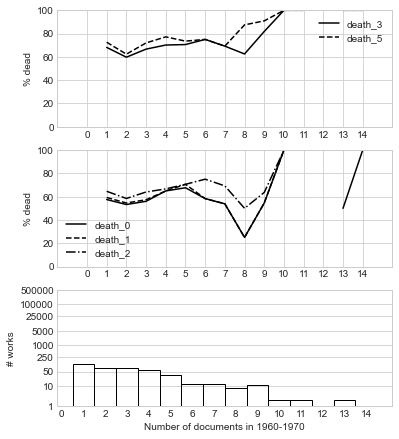

In [7]:
dead_now_cited_when(1960,1970, xmax=CNT_LIM)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


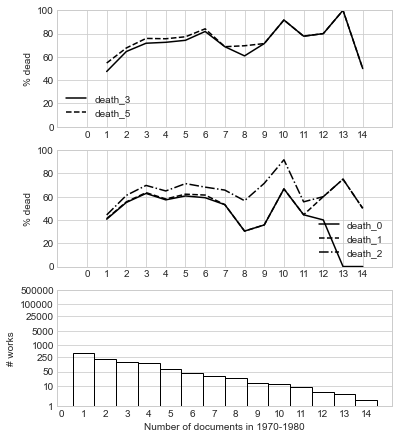

In [8]:
dead_now_cited_when(1970,1980, xmax=CNT_LIM)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


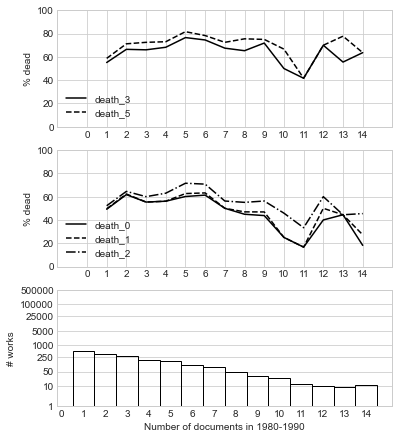

In [9]:
dead_now_cited_when(1980,1990, xmax=CNT_LIM)